<a href="https://colab.research.google.com/github/agustinbrusco/Physics-and-Math-Plots/blob/main/Campos_Vectoriales_y_Escalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización Interactiva de Campos Vectoriales en $\mathbb{R}^2$ y en $\mathbb{R}^3$
Autor: Brusco Agustín (agustin.brusco@gmail.com)

In [ ]:
#@title $\text{Importe de Librerías y Definiciones}$ { display-mode: "form" }
#@markdown Darle play a esta celda

# Importo las librerías
import numpy as np  # Para el cálculo numérico
import sympy as sp  # Para cálculo simbolico y detalles esteticos
# Algunas funciones y constantes que pueden ser referenciadas sin prefijos:
from sympy import cos, sin, exp, sqrt, log, pi, E, Abs
from sympy.vector import Del as nabla
ln = log
sen = sin
i = sp.I
e = sp.E
x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
from scipy.special import factorial
import matplotlib.pyplot as plt  # Para gráficos en 2D
import plotly.graph_objects as go  # Para gráficos 3D interactivos
from matplotlib import rcParams  # Para graficar en alta resolución
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'

# Defino las funciones:

## Primero algunas Funciones Auxiliares:
def Grad(vars, func):
    '''Calcula simbolicamente el gradiente de func en las variables de vars.

    Parametros
    ----------
        vars : list, tuple (iterable) of sympy symbols
                Ejemplo: [x, y, z]

        func : Sympy expression of a function
                Ejemplo: 3*x + cos(y)/exp(z)

    Devuelve
    --------
        grad : list of sympy expressions
                La lista que contiene las derivadas parciales de func
                respecto de vars en el orden de vars.
                Ejemplo: [3, -exp(-z)*sin(y), -exp(-z)*cos(y)]
    '''
    grad = []
    for xi in vars:
        grad.append(func.diff(xi))
    return grad


def Rot(vars, func):
    '''Calcula simbolicamente el rotor del campo que tiene en sus componentes
        a los elementos de func en la terna derecha de vars.

    Parametros
    ----------
        vars : list, tuple (iterable) of sympy symbols
                Ejemplo: [x, y, z]

        func : list, tuple or vector_like of 3 Sympy expressions
                func debe contener en su elemento i-ésimo una función asociada
                a la i-ésima componente del campo vectorial cuyo rotor se
                quiere calcular.
                Ejemplo: [y*z/x, x*z/y, x*y/z]

    Devuelve
    --------
        P, Q, R : tuple of 3 sympy expressions
                La tupla que contiene en cada elemento la componente
                correspondiente del rotor de func en coordenadas vars.
                Ejemplo: (x/z - x/y, -y/z + y/x, z/y - z/x)
    '''
    P = func[2].diff(vars[1]) - func[1].diff(vars[2])
    Q = func[0].diff(vars[2]) - func[2].diff(vars[0])
    R = func[1].diff(vars[0]) - func[0].diff(vars[1])
    return P, Q, R


def Div(vars, func):
    '''Calcula simbolicamente la divergencia del campo que tiene en sus
        componentes a los elementos de func respecto de las variables de vars.
        
    Parametros
    ----------
        vars : list, tuple (iterable) of sympy symbols
                Ejemplo: [x, y, z]

        func : list, tuple or vector_like of 3 Sympy expressions
                func debe contener en su elemento i-ésimo una función asociada
                a la i-ésima componente del campo vectorial cuya divergencia se
                quiere calcular.
                Ejemplo: [(y+z)*x, (x+z)*y, (x+y)*z]

    Devuelve
    --------
        div : sympy expression
                Expresión simbólica de la divergencia de func en las variables
                de vars.
                Ejemplo: 2*x + 2*y + 2*z
    '''
    div = func[0].diff(vars[0]) + func[1].diff(vars[1]) + func[2].diff(vars[2])
    return div


## Usando Matplotlib para R²
def Campo_Vectorial_R2(u, v, dom_x=[-5., 5.], dom_y=[-5., 5.],
                    repr="Vectorial", res=20, colors='cool'):
    '''Grafica el campo vectorial F(x,y)=(u(x,y), v(x,y)) en R² usando las
    funciones quiver o streamplot de matplotlib.

    Parametros
    ----------
        u, v : sympy expressions
                Expresiones simbolicas de las funciones de las componentes
                en x e y del campo vectorial.
                Solo deben estar en función de x e y.
                Ejemplo: u=y*cos(x), v=x*sin(y)

        dom_x, dom_y : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5]

        repr : {"Vectorial", "Flujo"}, default : "Vectorial"
                Manera en la que se representará el campo vectorial.
                Vectorial: Utiliza la función quiver de matplotlib para llenar
                el dominio con vectores que apuntan en la dirección correcta.
                Flujo: Utiliza la función streamplot de matplotlib para llenar
                el dominio con lineas de flujo correspondientes al campo.

        res : int, default : 20
                Raíz cuadrada de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x" y de "y" y se
                completará una grilla de "x" contra "y" (res×res elementos)
                como dominio.

        colors : str, default : "cool"
                String con el nombre de un mapa de color de matplotlib.
                Para ver todas las opciones visitar:
                https://matplotlib.org/stable/tutorials/colors/colormaps.html

    Devuelve
    --------
        fig, ax : tuple
                Una tupla que contiene a la figura y el gráfico,
                fig (matplotlib.figure.Figure) y
                ax (matplotlib.axes._subplots.AxesSubplot), generados por la
                función. Para visualizar el plot, ejecutar luego plt.show().

    '''
    # Se transforman las funciones simbolicas en funciones numericas
    x, y = sp.symbols('x y', real=True)  # Definición de variables simbolicas
    u_num = sp.lambdify([x, y], u, 'numpy')
    v_num = sp.lambdify([x, y], v, 'numpy')
    # Preparo las variables del dominio
    x = np.linspace(dom_x[0], dom_x[1], res)
    y = np.linspace(dom_y[0], dom_y[1], res)
    X, Y = np.meshgrid(x, y)
    # Calculo las variables de la imagen
    U = u_num(X, Y)
    V = v_num(X, Y)
    # Normalizo para la representación gráfica
    norm = np.sqrt(U**2 + V**2)
    # Preparo el gráfico
    fig = plt.figure(figsize=(8, 5), dpi=150)
    ax = fig.add_subplot()
    ax.set_facecolor('whitesmoke')
    # Detalle en el título
    ltx_expr = sp.latex((u, v))
    fig.suptitle(r'$\overrightarrow{F}(x,y) = '+ltx_expr+'$', fontsize=14)
    # Grafico el campo vectorial en alguno de los estilos
    if repr == 'Vectorial':
        map = ax.quiver(X, Y, U/norm, V/norm, norm, cmap=colors)
    elif repr == 'Flujo':
        stream = ax.streamplot(X, Y, U/norm, V/norm, color=norm, cmap=colors)
        map = stream.lines
    else:
        raise ValueError(f'{repr} no es una opción valida de representación.' +
                         ' Elegir una de dos: "Vectorial" o "Flujo".')
    # Referencia para los colores
    plt.colorbar(map, ax=ax,
                 label=r'$|\overrightarrow{F}\ |$')
    # Detalles de formato
    ax.grid(True)
    if x[-1] - x[0] == y[-1] - y[0]:
        ax.axis('square')
    ax.set_xlim(x[0]*1.05, x[-1]*1.05)
    ax.set_xlabel('x')
    ax.set_ylim(y[0]*1.05, y[-1]*1.05)
    ax.set_ylabel('y')
    return fig, ax


def Campo_Escalar_R2(f, dom_x=[-5., 5.], dom_y=[-5., 5.],
                     repr="Superficie", res=20, colors='plasma'):
    '''Grafica las curvas de nivel de f(x,y) en R² usando la función contourf
     de matplotlib.

    Parametros
    ----------
        f : sympy expression
                Expresión simbólica del campo escalar en función de x e y.
                Ejemplo: f=1/sqrt(x**2 + y**2)

        dom_x, dom_y : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5]

        repr : {"Superficie", "Curvas de nivel"}, default : "Superficie"
                Manera en la que se representará el campo escalar.
                Superficie: Utiliza la función Surface de plotly para graficar
                una superficie 3D cuya altura representa el valor de f.
                Curvas de nivel: Utiliza la función strecontourf de matplotlib
                para pintar regiones del dominio delimitadas por curvas de nivel
                correspondientes al campo.

        res : int, default : 20
                Raíz cuadrada de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x" y de "y" y se
                completará una grilla de "x" contra "y" (res×res elementos)
                como dominio.

        colors : str, default : "plasma"
                String con el nombre de un mapa de color de la librería que
                corresponda a la representación elegida.
                Para ver todas las opciones visitar:
                https://matplotlib.org/stable/tutorials/colors/colormaps.html
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        Si repr == "Superficie"
        fig : 
        Si repr == "Curvas de nivel"
        fig, ax : tuple
                Una tupla que contiene a la figura y el gráfico,
                fig (matplotlib.figure.Figure) y
                ax (matplotlib.axes._subplots.AxesSubplot), generados por la
                función. Para visualizar el plot, ejecutar luego plt.show().

    '''
    # Se transforman las funciones simbolicas en funciones numericas
    x, y = sp.symbols('x y', real=True)  # Definición de variables simbolicas
    f_num = sp.lambdify([x, y], f, 'numpy')
    # Preparo las variables del dominio
    x = np.linspace(dom_x[0], dom_x[1], res)
    y = np.linspace(dom_y[0], dom_y[1], res)
    X, Y = np.meshgrid(x, y)
    # Calculo las variables de la imagen
    Z = f_num(X, Y)
    # Detalle en el título
    ltx_expr = sp.latex(f)
    if repr == "Superficie":
        fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z,
                                         colorscale=colors)])
        fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
        fig.update_layout(title={'text': r'$f(x,y) = '+ltx_expr+'$',
                             'y':0.9, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',})
                        #   autosize=False,
                        #   scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
                        #   width=500, height=500,
                        #   margin=dict(l=65, r=50, b=65, t=90))
        return fig
    elif repr == "Curvas de nivel":
        # Preparo el gráfico
        fig = plt.figure(figsize=(8, 5), dpi=150)
        ax = fig.add_subplot()
        fig.suptitle(r'$f(x,y) = '+ltx_expr+'$', fontsize=14)
        # Grafico el campo escalar
        map = ax.contourf(X, Y, Z, cmap=colors)
        # Referencia para los colores
        plt.colorbar(map, ax=ax, label=r'$f(x,y)$')
        # Detalles de formato
        ax.grid(True)
        if x[-1] - x[0] == y[-1] - y[0]:
            ax.axis('square')
        ax.set_xlim(x[0], x[-1])
        ax.set_xlabel('x')
        ax.set_ylim(y[0], y[-1])
        ax.set_ylabel('y')
        return fig, ax
    else:
        raise ValueError(f'{repr} no es una opción valida de representación.' +
                         ' Elegir una de dos: "Superficie" o "Curvas de nivel".')


## Usando Plotly para R²
def Campo_Vectorial_R3(u, v, w, dom_x=[-5., 5.], dom_y=[-5., 5.], dom_z=[-5., 5.],
                       random=False, res=10, colors='plotly3'):
    '''Grafica el campo vectorial F(x,y,z)=(u(x,y,z), v(x,y,z), w(x,y,z)) en R³
     utilizando la función Cone de Plotly.

    Parametros
    ----------
        u, v, w : sympy expressions
                Expresiones simbolicas de las funciones de las componentes
                en x, y, z del campo vectorial.
                Solo deben estar en función de estas tres variables.
                Ejemplo: u=x*sqrt(x**2 + y**2 + z**2),
                         v=y*sqrt(x**2 + y**2 + z**2),
                         w=z*sqrt(x**2 + y**2 + z**2)

        dom_x, dom_y, dom_z : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5], dom_z=[-pi, pi]

        random : bool, default : False
                Define el modo en el que se creará el dominio.
                False: Se define una grilla cúbica dada por dom_x×dom_y×dom_z
                de puntos equidistantes entre sí.
                True: Se extraen puntos de una distribución gaussiana de forma
                aleatoria, con un 66% de probabilidad de caer en la región
                central del cubo definido por dom_x, dom_y y dom_z.
                Observación: Con cada ejecución el dominio vuelve a computarse
                de forma aleatoria (a menos que se especifiquen semillas para
                el generador dentro de la función), por lo que cada gráfico es
                único.

        res : int, default : 20
                Raíz cúbica de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x", de "y" y
                de "z", se completará una grilla de "x" contra "y" contra "z"
                (res×res×res elementos) como dominio.

        colors : str, default : "plotly3"
                String con el nombre de un mapa de color de plotly.
                Para ver todas las opciones visitar:
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        fig : plotly.graph_objs._figure.Figure
                La figura de plotly rellena con plotly.graph_objects.Cone,
                generados por la función.
                Para visualizar el plot, ejecutar luego fig.show().

    '''
    # Se transforman las funciones simbolicas en funciones numericas
    x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
    u_num = sp.lambdify([x, y, z], u, 'numpy')
    v_num = sp.lambdify([x, y, z], v, 'numpy')
    w_num = sp.lambdify([x, y, z], w, 'numpy')
    if random:
        # Preparo las variables del dominio numérico
        res = res**3
        generator = np.random.default_rng()
        x = generator.normal((dom_x[0]+dom_x[1])/2,
                             (dom_x[1]-dom_x[0])/4, res)
        generator = np.random.default_rng()
        y = generator.normal((dom_y[0]+dom_y[1])/2,
                             (dom_y[1]-dom_y[0])/4, res)
        generator = np.random.default_rng()
        z = generator.normal((dom_z[0]+dom_z[1])/2,
                             (dom_z[1]-dom_z[0])/4, res)
        # Calculo las variables de la imagen
        U = u_num(x, y, z)
        V = v_num(x, y, z)
        W = w_num(x, y, z)
    else:
        # Preparo las variables del dominio numérico
        x = np.linspace(dom_x[0], dom_x[1], res)
        y = np.linspace(dom_y[0], dom_y[1], res)
        z = np.linspace(dom_z[0], dom_z[1], res)
        X, Y, Z = np.meshgrid(x, y, z)
        x = X.flatten()
        y = Y.flatten()
        z = Z.flatten()
        # Calculo las variables de la imagen
        U = u_num(x, y, z)
        V = v_num(x, y, z)
        W = w_num(x, y, z)
    # Corrijo en caso de constantes:
    if np.size(U)  != x.size:
        U = np.ones_like(x)*U
    if np.size(V)  != y.size:
        V = np.ones_like(y)*V
    if np.size(W)  != z.size:
        W = np.ones_like(z)*W
    # Normalizo para la representación gráfica
    norm = np.sqrt(U**2 + V**2 + W**2)
    # Detalle en el título
    ltx_expr = sp.latex((u, v, w))
    # Gráfico con Plotly
    fig = go.Figure(data=go.Cone(x=x, y=y, z=z, u=U, v=V, w=W,
                                    colorscale=colors, sizeref=1,))
                                    # anchor="tail"))
    fig.update_traces(colorbar_title={'text':r'$|\overrightarrow{F}(x,y,z)|$'},
                      colorbar_title_side='right',
                      colorbar={'x':0.85})
    fig.update_layout(scene=dict(domain_x=[0, 1],
                                 camera_eye=dict(x=-1.57, y=1.36, z=0.58)))
    fig.update_layout(title={'text': r'$\overrightarrow{F}(x,y,z) = '+ltx_expr+'$',
                             'y':0.9, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',})    
    return fig


def Campo_Escalar_R3(f, dom_x=[-5., 5.], dom_y=[-5., 5.], dom_z=[-5., 5.],
                     res=20, alpha=0.1, colors="Agsunset_r"):
    '''Grafica el campo escalar f(x,y,z) en R³ utilizando la función
       Volume de Plotly.

    Parametros
    ----------
        f : sympy expression
                Expresión simbolica de la función del campo escalar.
                Solo deben estar en función de las variables x, y, z.
                Ejemplo: f=(1/sqrt((x-2)**2 + (y-2)**2 + (z-2)**2) -
                            1/sqrt((x+2)**2 + (y+2)**2 + (z+2)**2))
        
        dom_x, dom_y, dom_z : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5], dom_z=[-pi, pi]

        res : int, default : 20
                Raíz cúbica de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x", de "y" y
                de "z", se completará una grilla de "x" contra "y" contra "z"
                (res×res×res elementos) como dominio.

        alpha : float, default : 0.1
                Opacidad de las superficies graficadas. Aumentar si el volumen
                casi transparente. Disminuir para si las superficies se tapan
                entre sí.

        colors : str, default : "plotly3"
                String con el nombre de un mapa de color de plotly.
                Para ver todas las opciones visitar:
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        fig : plotly.graph_objs._figure.Figure
                La figura de plotly rellena con plotly.graph_objects.Cone,
                generados por la función.
                Para visualizar el plot, ejecutar luego fig.show().

    '''
    # Se transforman las funciones simbolicas en funciones numericas
    x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
    f_num = sp.lambdify([x, y, z], f, 'numpy')
    # Preparo las variables del dominio numérico
    x = np.linspace(dom_x[0], dom_x[1], res)
    y = np.linspace(dom_y[0], dom_y[1], res)
    z = np.linspace(dom_z[0], dom_z[1], res)
    X, Y, Z = np.meshgrid(x, y, z)
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    # Calculo la imagen
    F = f_num(x, y, z)
    # Reviso si falló:
    if np.size(F)  != x.size or np.isnan(F).any():
        raise ValueError('No es posible graficar este campo escalar.\n' +
                         'O bien es constante o bien presenta algún otro ' +
                         'problema.')
    # Detalle en el título
    ltx_expr = sp.latex(f)
    # Gráfico con Plotly
    fig = go.Figure(data=go.Volume(x=x, y=y, z=z, value=F,
                                   isomin=F.min(), isomax=F.max(), opacity=alpha,
                                   surface_count=30, colorscale=colors))
    fig.update_traces(colorbar_title={'text':r'$f(x,y,z)$'},
                      colorbar_title_side='right',
                      colorbar={'x':0.8})
    fig.update_layout(scene=dict(domain_x=[0, 1],
                                 camera_eye=dict(x=-1.57, y=1.36, z=0.58)))
    fig.update_layout(title={'text': r'$f(x,y,z) = '+ltx_expr+'$',
                             'y':0.9, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',})    
    return fig


def Graficar_Gradiente(f, dom_x=[-5., 5.], dom_y=[-5., 5.], dom_z=[-5., 5.],
                       random=False, res=10, colors='plotly3'):
    '''Grafica el gradiente de una función de R en R³ f(x,y,z)
    uilizando la función Cone de Plotly.

    Parametros
    ----------
        f : sympy expression
                Expresión simbolica de la función del campo escalar.
                Solo deben estar en función de las variables x, y, z.
                Ejemplo: f=(1/sqrt((x-2)**2 + (y-2)**2 + (z-2)**2) -
                            1/sqrt((x+2)**2 + (y+2)**2 + (z+2)**2))
        
        dom_x, dom_y, dom_z : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5], dom_z=[-pi, pi]

        random : bool, default : False
                Define el modo en el que se creará el dominio.
                False: Se define una grilla cúbica dada por dom_x×dom_y×dom_z
                de puntos equidistantes entre sí.
                True: Se extraen puntos de una distribución gaussiana de forma
                aleatoria, con un 66% de probabilidad de caer en la región
                central del cubo definido por dom_x, dom_y y dom_z.
                Observación: Con cada ejecución el dominio vuelve a computarse
                de forma aleatoria (a menos que se especifiquen semillas para
                el generador dentro de la función), por lo que cada gráfico es
                único.

        res : int, default : 20
                Raíz cúbica de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x", de "y" y
                de "z", se completará una grilla de "x" contra "y" contra "z"
                (res×res×res elementos) como dominio.

        colors : str, default : "plotly3"
                String con el nombre de un mapa de color de plotly.
                Para ver todas las opciones visitar:
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        None

    '''
    # Calcula el gradiente de f(x,y,z) dado por Grad(F) = (u, v, w)
    x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
    u, v, w = Grad([x, y, z], f)
    ltx_expr = sp.latex((u, v, w))
    fig = Campo_Vectorial_R3(u, v, w, dom_x, dom_y, dom_z, random, res, colors)
    fig.update_traces(colorbar_title={'text':r'$|\nabla f(x,y,z)|$'},
                      colorbar_title_side='right',
                      colorbar={'x':0.9})
    fig.update_layout(title={'text': r'$\nabla f(x,y,z) = '+ltx_expr+'$',
                             'y':0.9, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',})    
    fig.show()
    return


def Graficar_Rotor(u, v, w, dom_x=[-5., 5.], dom_y=[-5., 5.], dom_z=[-5., 5.],
                       random=False, res=10, colors='plotly3'):
    '''Grafica el rotor del campo vectorial
       F(x,y,z) = (u(x,y,z), v(x,y,z), w(x,y,z)) utilizando la función
       Cone de Plotly.

    Parametros
    ----------
        u, v, w : sympy expressions
                Expresiones simbolicas de las funciones de las componentes
                en x, y, z del campo vectorial cuyo rotor se quiere graficar.
                Solo deben estar en función de estas tres variables.
                Ejemplo: u=x*sqrt(x**2 + y**2 + z**2),
                         v=y*sqrt(x**2 + y**2 + z**2),
                         w=z*sqrt(x**2 + y**2 + z**2)

        dom_x, dom_y, dom_z : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo vectorial. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5], dom_z=[-pi, pi]

        random : bool, default : False
                Define el modo en el que se creará el dominio.
                False: Se define una grilla cúbica dada por dom_x×dom_y×dom_z
                de puntos equidistantes entre sí.
                True: Se extraen puntos de una distribución gaussiana de forma
                aleatoria, con un 66% de probabilidad de caer en la región
                central del cubo definido por dom_x, dom_y y dom_z.
                Observación: Con cada ejecución el dominio vuelve a computarse
                de forma aleatoria (a menos que se especifiquen semillas para
                el generador dentro de la función), por lo que cada gráfico es
                único.

        res : int, default : 20
                Raíz cúbica de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x", de "y" y
                de "z", se completará una grilla de "x" contra "y" contra "z"
                (res×res×res elementos) como dominio.

        colors : str, default : "plotly3"
                String con el nombre de un mapa de color de plotly.
                Para ver todas las opciones visitar:
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        None

    '''
    # Calcula el rotor de F = (u, v, w) dado por Rot(F) = (P, Q, R)
    x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
    P, Q, R = Rot([x, y, z], [u, v, w])
    ltx_expr = sp.latex((P, Q, R))
    fig = Campo_Vectorial_R3(P, Q, R, dom_x, dom_y, dom_z, random, res, colors)
    fig.update_traces(colorbar_title={'text':r'$|\nabla \times \overrightarrow{F}(x,y,z)|$'},
                      colorbar_title_side='right',
                      colorbar={'x':0.9})
    fig.update_layout(title={'text': r'$\nabla \times \overrightarrow{F}(x,y,z) = '+ltx_expr+'$',
                             'y':0.9, 'x':0.5,
                             'xanchor': 'center', 'yanchor': 'top',})    
    fig.show()
    return


def Graficar_Divergencia(u, v, w,
                         dom_x=[-5., 5.], dom_y=[-5., 5.], dom_z=[-5., 5.],
                         res=20, alpha=0.1, colors="Agsunset_r"):
    '''Grafica la Divergencia del campo vectorial
       F(x,y,z)=(u(x,y,z), v(x,y,z), w(x,y,z)) en R³ utilizando la función
       Volume de Plotly.

    Parametros
    ----------
        u, v, w : sympy expressions
                Expresiones simbolicas de las funciones de las componentes
                en x, y, z del campo vectorial cuya divergencia se quiere
                graficar. Solo deben estar en función de estas tres variables.
                Ejemplo: u=x*sqrt(x**2 + y**2 + z**2),
                         v=y*sqrt(x**2 + y**2 + z**2),
                         w=z*sqrt(x**2 + y**2 + z**2)

        dom_x, dom_y, dom_z : list or tuple of 2 elements, default : [-5, 5]
                Extremos del dominio numerico que se generará para graficar
                el campo escalar. El primer elemento debería ser el limite
                inferior mientras que el segundo elemento debería ser el limite
                superior del dominio para una dada variable.
                Ejemplo: dom_x=[-10, 10], dom_y=[0, 5], dom_z=[-pi, pi]

        res : int, default : 20
                Raíz cúbica de la cantidad de puntos en los que se calculará
                el campo. Es decir, se tomarán res valores de "x", de "y" y
                de "z", se completará una grilla de "x" contra "y" contra "z"
                (res×res×res elementos) como dominio.

        alpha : float, default : 0.1
                Opacidad de las superficies graficadas. Aumentar si el volumen
                casi transparente. Disminuir para si las superficies se tapan
                entre sí.

        colors : str, default : "plotly3"
                String con el nombre de un mapa de color de plotly.
                Para ver todas las opciones visitar:
                https://plotly.com/python/builtin-colorscales/

    Devuelve
    --------
        None

    '''
    # Calcula la Divergencia de F = (u, v, w) dado por Div(F) = S
    x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
    S = Div([x, y, z], [u, v, w])
    ltx_expr = sp.latex(S)
    fig = Campo_Escalar_R3(S, dom_x, dom_y, dom_z, res, alpha, colors)
    fig.update_traces(colorbar_title={'text':r'$\nabla \cdot \overrightarrow{F}(x,y,z)$'},)
    fig.update_layout(title={'text': r'$\nabla \cdot \overrightarrow{F}(x,y,z) = '+ltx_expr+'$'})
    fig.show()
    return



## Gráficos Interactivos
Estas funciones reciben como argumento principal otras funciones ($u:\mathbb{R^n} \to \mathbb{R}$, $v:\mathbb{R^n} \to \mathbb{R}$, $w:\mathbb{R^n} \to \mathbb{R}$). Para darle este tipo de funciones matematicas a python se utilizó la librería sympy de cálculo simbólico. Acá abajo dejo algunos ejemplos para hacer más claro el uso de las celdas interactivas.

####$\overrightarrow{F}: \mathbb{R}^2 \to \mathbb{R}^2$

* $\displaystyle u(x, y) = x \cdot \cos(y) \mapsto$ `u: x*cos(y)`

* $\displaystyle v(x, y) = y \cdot \sin(x) \mapsto$ `v: x*sin(y)`

* $\displaystyle u(x, y) = \frac{x - y}{\sqrt{x^2 + y^2}} \mapsto$ `u: (x-y)/sqrt(x**2 + y**2)`

* $\displaystyle v(x, y) = y \cdot e^{-|x|} \mapsto$ `v: y*exp(-Abs(x))`

* $\displaystyle u(x, y) = x^{2y} \mapsto$ `u: x**(2*y)`

* $\displaystyle v(x, y) = \frac{x^2 + x \cdot y + y - 2}{\cos^2{x}+1} \mapsto$ `v: (x**2 + x*y + y - 2)/(cos(x)**2 + 1)`

####$\overrightarrow{F}: \mathbb{R}^3 \to \mathbb{R}^3$

* $\displaystyle u(x, y, z) = x^{-(y-z)^2} \mapsto$ `u: x**(-(y-z)**2)`

* $\displaystyle v(x, y, z) = (x+y) \cdot z \mapsto$ `u: (x+y)*z`

* $\displaystyle w(x, y, z) =  \frac{x \cdot z}{(\sqrt{x^2+y^2+z^2})^3} \mapsto$ `u: x*z/(x**2+y**2+z**2)**(3/2)`

#$\text{Campos Vectoriales}\quad \overrightarrow{F}:\mathbb{R^2}\to\mathbb{R^2}$
###$\text{sean }u, v:\mathbb{R^2}\to\mathbb{R}\text{, se define:}$

##$$\overrightarrow{F}(x,y)=\left(u(x,y), v(x,y)\right)$$



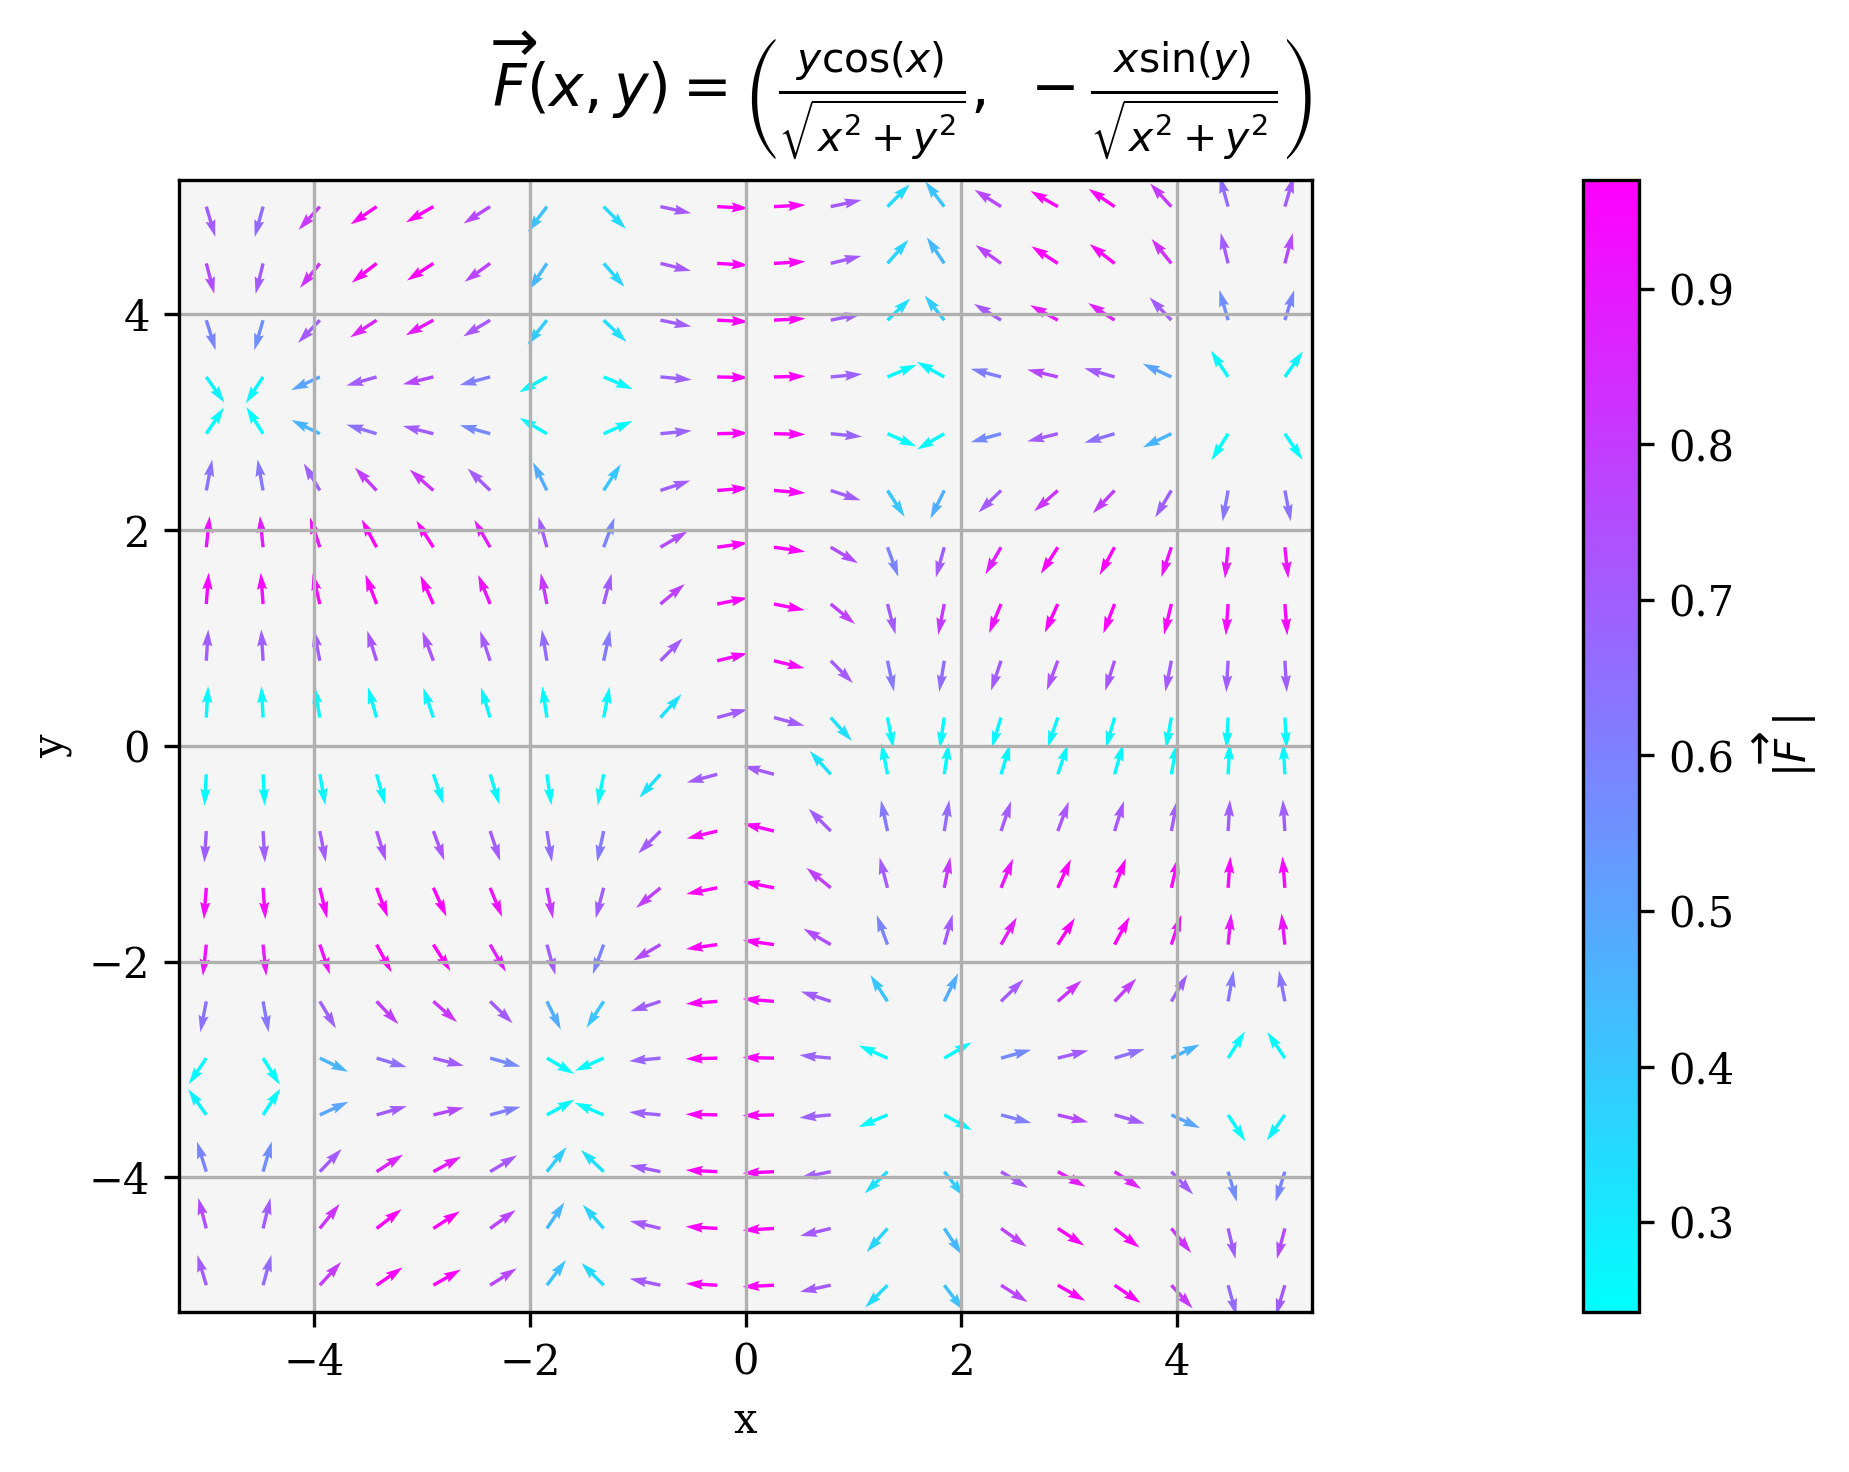

In [ ]:
#@title { display-mode: "form" }
#@markdown Ctrl+Enter o Play para ejecutar cambios

#@markdown Las componentes del campo F(x,y) = (u(x,y), v(x,y))
# Se definen de forma simbolica las variables y las funciones
x, y = sp.symbols('x y', real=True)  # Definición de variables simbolicas
u = y*cos(x)/sqrt(x**2 + y**2) #@param ["x+y", "y", "x*cos(y)"] {type:"raw", allow-input: true}
v = -x*sin(y)/sqrt(x**2 + y**2) #@param ["x-y", "-x", "y*sin(x)"] {type:"raw", allow-input: true}

#@markdown Extremos del dominio rectangular (x, y) ∈ [a, b]×[c, d]
dominio_x = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}

#@markdown Raíz cuadrada de la cantidad de valores en el dominio (ojo, no zarparse: ~20 está bien para Vectorial, 100 alcanza para Flujo)
resolución = 20  #@param ["10", "20", "50", "100"] {type:"raw", allow-input: true}

#@markdown Opciones interactivas sobre la estetica:
representación = "Vectorial" #@param ["Vectorial", "Flujo"]
colores = "cool" #@param ["plasma", "magma", "viridis", "cool", "ocean", "hot", "cividis", "jet", "Blues_r", "Greens_r", "Reds_r"] {allow-input: true}

# Ejecuto la función que grafica el campo.
fig, ax = Campo_Vectorial_R2(u, v, dominio_x, dominio_y, representación,
                          resolución, colores)
plt.show()

#$\text{Campos Escalares}\quad f:\mathbb{R^2}\to\mathbb{R}$

##$$f(x,y)$$

In [ ]:
#@title { display-mode: "form" }
#@markdown Ctrl+Enter o Play para ejecutar cambios

#@markdown El campo escalar f(x, y)
# Se definen de forma simbolica las variables y la función
x, y = sp.symbols('x y', real=True)  # Definición de variables simbolicas
f = sin(pi*x)/x + (cos(pi*y)-1)/y #@param ["x*y/(x**2 + y**2)", "5*exp(-x**2 - y**2)+sqrt(x**2 + y**2)", "cos(pi*x/2)+sin(pi*y/2)"] {type:"raw", allow-input: true}

#@markdown Extremos del dominio rectangular (x, y) ∈ [a, b]×[c, d]
dominio_x = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}

#@markdown Raíz cuadrada de la cantidad de valores en el dominio
resolución =   60#@param ["30", "60", "90", "120"] {type:"raw", allow-input: true}

#@markdown Opciones interactivas sobre la estetica:
representación = "Superficie" #@param ["Superficie", "Curvas de nivel"]
colores = "jet" #@param ["plasma", "magma", "viridis", "ocean", "hot", "cividis", "jet", "Blues_r", "Greens_r", "Reds_r"] {allow-input: true}
#@markdown Observación: No todos los colores son compatibles con ambos tipos de representación
# Ejecuto la función que grafica el campo.
if representación == "Superficie":
    fig = Campo_Escalar_R2(f, dominio_x, dominio_y,
                           representación, resolución, colores)
    fig.show()
else:
    fig, ax = Campo_Escalar_R2(f, dominio_x, dominio_y,
                               representación, resolución, colores)
    plt.show()

#$\text{Campos Vectoriales}\quad \overrightarrow{F}:\mathbb{R^3}\to\mathbb{R^3}$
###$\text{sean }u, v, w:\mathbb{R^3}\to\mathbb{R}\text{, se define:}$

##$$\overrightarrow{F}(x,y,z)=\left(u(x,y,z), v(x,y,z), w(x,y,z)\right)$$

In [ ]:
#@title $\overrightarrow{F}=(u, v, w)$ { display-mode: "form" }
#@markdown Ctrl+Enter o Play para ejecutar cambios

#@markdown Las componentes del campo F(x,y,z) = (u(x,y,z), v(x,y,z), w(x,y,z))
# Se definen de forma simbolica las variables y las funciones
x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
u =  y*x/sqrt(x**2 + y**2 + z**2)#@param ["-x+y+z", "y-z+5", "y*x/sqrt(x**2 + y**2 + z**2)"] {type:"raw", allow-input: true}
v = -y*z/sqrt(x**2 + y**2 + z**2) #@param ["x-y+z", "z-x+5", "-y*z/sqrt(x**2 + y**2 + z**2)"] {type:"raw", allow-input: true}
w = -z*x/sqrt(x**2 + y**2 + z**2) #@param ["x+y-z", "x-y+5", "-z*x/sqrt(x**2 + y**2 + z**2)"] {type:"raw", allow-input: true}
#@markdown Extremos del dominio rectangular (x, y, z) ∈ [a, b]×[c, d]×[e, f]
dominio_x = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_z = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
#@markdown Raíz cúbica de la cantidad de valores en el dominio (ojo, no zarparse: ~8 está bien)
resolución =   10#@param ["4", "5", "8", "10"] {type:"raw", allow-input: true}
#@markdown Paleta de colores para el plot
colores = "jet" #@param ["jet", "plotly3", "matter", "Agsunset", "tempo", "dense", "ice", "Bluered", "IceFire"] {allow-input: true}
#@markdown ¿Generar dominio aleatoriamente dentro de los extremos dados? (Caso contrario se genera una grilla cubica)
aleatorio = False #@param {type:"boolean"}
#@markdown Obs: El modo aleatorio puede requerir varias ejecuciones hasta presentar un gráfico representativo

fig = Campo_Vectorial_R3(u, v, w, dominio_x, dominio_y, dominio_z,
                         aleatorio, resolución, colores)
fig.show()
#@markdown Rotar con el mouse, hacer zoom con ruedita

##$\text{Rotor del Campo Vectorial}\quad \nabla \times \overrightarrow{F}:\mathbb{R^3}\to\mathbb{R^3}$

###$$\nabla \times \overrightarrow{F} = \left(\frac{\partial \overrightarrow{F_z}}{\partial y} - \frac{\partial \overrightarrow{F_y}}{\partial z}, \frac{\partial \overrightarrow{F_x}}{\partial z} - \frac{\partial \overrightarrow{F_z}}{\partial x}, \frac{\partial \overrightarrow{F_y}}{\partial x} - \frac{\partial \overrightarrow{F_x}}{\partial y}\right)$$

In [ ]:
#@title { display-mode: "form" }
#@markdown Ejecutar solamente luego de correr la celda de arriba.

#@markdown Extremos del dominio rectangular (x, y, z) ∈ [a, b]×[c, d]×[e, f]
dominio_x = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_z = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
#@markdown Raíz cúbica de la cantidad de valores en el dominio
resolución =   10#@param ["4", "5", "8", "10"] {type:"raw", allow-input: true}
#@markdown Paleta de colores para el plot
colores = "jet" #@param ["jet", "plotly3", "matter", "Agsunset", "tempo", "dense", "ice", "Bluered", "IceFire"] {allow-input: true}
#@markdown ¿Generar dominio aleatoriamente dentro de los extremos dados? (Caso contrario se genera una grilla cubica)
aleatorio = False #@param {type:"boolean"}
#@markdown Obs: El modo aleatorio puede requerir varias ejecuciones hasta presentar un gráfico representativo

display(sp.Eq(sp.symbols('F'), (u, v, w)))
Graficar_Rotor(u, v, w, dominio_x, dominio_y, dominio_z,
               aleatorio, resolución, colores)
#@markdown Rotar con el mouse, hacer zoom con ruedita

Eq(F, (x*y/sqrt(x**2 + y**2 + z**2), -y*z/sqrt(x**2 + y**2 + z**2), -x*z/sqrt(x**2 + y**2 + z**2)))

##$\text{Divergencia del Campo Vectorial} \quad \nabla \cdot \overrightarrow{F}:\mathbb{R^3}\to\mathbb{R}$

###$$\nabla \cdot \overrightarrow{F}=\frac{\partial \overrightarrow{F_x}}{\partial x}+\frac{\partial \overrightarrow{F_y}}{\partial y}+\frac{\partial \overrightarrow{F_z}}{\partial z}$$

In [ ]:
#@title { display-mode: "form" }
#@markdown Ejecutar solamente luego de correr la celda de Campos en R³.

#@markdown Extremos del dominio rectangular x, y, z ∈ [a, b]×[c, d]×[e, f]
dominio_x = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_z = [-5, 5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
#@markdown Raíz cúbica de la cantidad de valores en el dominio
resolución =   20#@param ["10", "14", "18", "20"] {type:"raw", allow-input: true}
#@markdown Opacidad de las superficies de nivel que se grafican
opacidad = 0.15  #@param ["0.1", "0.25", "0.5", "0.75"] {type:"raw", allow-input: true}
#@markdown Paleta de colores para el plot
colores = "jet" #@param ["jet", "PiYG", "Fall", "BrBG", "Agsunset_r", "tempo", "dense", "Bluered", "IceFire"] {allow-input: true}

display(sp.Eq(sp.symbols('F'), (u, v, w)))
Graficar_Divergencia(u, v, w,
                     dominio_x, dominio_y, dominio_z,
                     resolución, opacidad, colores)
#@markdown Rotar con el mouse, hacer zoom con ruedita

Eq(F, (x*y/sqrt(x**2 + y**2 + z**2), -y*z/sqrt(x**2 + y**2 + z**2), -x*z/sqrt(x**2 + y**2 + z**2)))

#$\text{Campos Escalares}\quad f:\mathbb{R^3}\to\mathbb{R}$

##$$f(x,y,z) $$

In [ ]:
#@title { display-mode: "form" }
#@markdown Ctrl+Enter o Play para ejecutar cambios

#@markdown Variable auxiliar predefinida: r = sqrt(x² + y² + z²)

#@markdown La función f(x,y,z)
# Se definen de forma simbolica las variables y las funciones
x, y, z = sp.symbols('x y z', real=True)  # Definición de variables simbolicas
r = sqrt(x**2 + y**2 + z**2)
f = (1/r - 1/sqrt((x+1)**2 + (y+1)**2 + (z+1)**2)) #@param ["-x+y+z", "y-z+5", "(1/r - 1/sqrt((x+2)**2 + (y+2)**2 + (z+2)**2))"] {type:"raw", allow-input: true}

#@markdown Extremos del dominio rectangular x, y, z ∈ [a, b]×[c, d]×[e, f]
dominio_x = [-1.5, 0.5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-1.5, 0.5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_z = [-1.5, 0.5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
#@markdown Raíz cúbica de la cantidad de valores en el dominio
resolución =   20#@param ["10", "14", "18", "20"] {type:"raw", allow-input: true}
#@markdown Opacidad de las superficies de nivel que se grafican
opacidad = 0.1  #@param ["0.1", "0.25", "0.5", "0.75"] {type:"raw", allow-input: true}
#@markdown Paleta de colores para el plot
colores = "IceFire" #@param ["jet", "PiYG", "Fall", "BrBG", "Agsunset_r", "tempo", "dense", "RdBu", "IceFire"] {allow-input: true}

fig = Campo_Escalar_R3(f, dominio_x, dominio_y, dominio_z,
                       resolución, opacidad, colores)
fig.show()
#@markdown Rotar con el mouse, hacer zoom con ruedita

##$\text{Gradiente del Campo Escalar}\quad\nabla f:\mathbb{R^3}\to\mathbb{R^3}$

###$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}\right)$$

In [ ]:
#@title { display-mode: "form" }
#@markdown Ejecutar solamente luego de correr la celda de arriba.

#@markdown Extremos del dominio rectangular (x, y, z) ∈ [a, b]×[c, d]×[e, f]
dominio_x = [-1.5, 0.5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_y = [-1.5, 0.5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
dominio_z = [-1.5, 0.5] #@param ["[-1, 1]", "[-5, 5]", "[-2*pi, 2*pi]", "[-20, 20]"] {type:"raw", allow-input: true}
#@markdown Raíz cúbica de la cantidad de valores en el dominio
resolución =   10#@param ["4", "5", "8", "10"] {type:"raw", allow-input: true}
#@markdown Paleta de colores para el plot
colores = "IceFire" #@param ["jet", "plotly3", "matter", "Agsunset", "tempo", "dense", "ice", "Bluered", "IceFire"] {allow-input: true}
#@markdown ¿Generar dominio aleatoriamente dentro de los extremos dados? (Caso contrario se genera una grilla cubica)
aleatorio = True #@param {type:"boolean"}
#@markdown Obs: El modo aleatorio puede requerir varias ejecuciones hasta presentar un gráfico representativo

display(sp.Eq(sp.symbols('f'), f))
Graficar_Gradiente(f, dominio_x, dominio_y, dominio_z,
                   aleatorio, resolución, colores)
#@markdown Rotar con el mouse, hacer zoom con ruedita

Eq(f, -1/sqrt((x + 1)**2 + (y + 1)**2 + (z + 1)**2) + 1/sqrt(x**2 + y**2 + z**2))